In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import random
from utils.load_csv import load_csv

In [2]:
consumo_diesel = load_csv('consumo_diesel.csv')

df_posicoes = load_csv('df_posicoes.csv')

df_final = load_csv('df_final.csv')

IDs que operam em mais de uma linha

In [3]:
df_posicoes

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m)
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m)
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus
...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03T11:34:57Z,-23.463490,-46.746013,False,Articulado (23m)
147588,6L02-10,66258,2025-09-03T11:34:51Z,-23.910759,-46.766351,False,Padron
147589,8021-10,80113,2025-09-03T11:35:01Z,-23.577175,-46.765109,True,Miniônibus
147590,6815-10,72011,2025-09-03T11:34:35Z,-23.656454,-46.763021,False,Articulado (18m)


In [4]:
df_posicoes['id_2'] = df_posicoes['linha'] + '_' + df_posicoes['id_onibus'].astype(str)

df_posicoes.head()

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus,342M-10_41501
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus,342M-10_41510
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus,342M-10_41583


In [5]:
df_posicoes['id_onibus'].nunique()

11524

In [6]:
df_posicoes['id_2'].nunique()

11544

In [7]:
df = df_posicoes.groupby('id_onibus')['linha'].nunique() > 1

ids_multilinhas = df_posicoes[df_posicoes['id_onibus'].isin(df[df].index)]

ids_multilinhas[['id_onibus', 'linha']].drop_duplicates().sort_values('id_onibus')

,id_onibus,linha
3020,7311,675K-10
80379,7311,675K-23
69005,7311,677A-10
11197,10418,8047-51
84319,10418,8047-10
8190,12683,917M-31
126142,12683,917M-10
41049,22116,1788-10
518,22116,1788-31
5199,31128,4310-21


In [8]:
counts = df_posicoes.groupby('id_onibus')['linha'].nunique()

ids_multilinhas = counts[counts > 1].index

ids_multilinhas

Index([ 7311, 10418, 12683, 22116, 31128, 36195, 36263, 36520, 41559, 47571,
       51449, 55093, 61221, 61668, 66943, 73837, 85763, 90999],
      dtype='int64', name='id_onibus')

Recalculando distâncias percorridas

In [9]:
gdf = gpd.GeoDataFrame(df_posicoes, geometry=gpd.points_from_xy(df_posicoes.lon, df_posicoes.lat), crs="EPSG:4326")

gdf = gdf.to_crs("EPSG:31983")

gdf

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2,geometry
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610,POINT (342081.78 7398124.086)
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus,342M-10_41501,POINT (348458.391 7389340.232)
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783,POINT (345521.61 7393173.434)
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus,342M-10_41510,POINT (349387.504 7387746.422)
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus,342M-10_41583,POINT (349387.504 7387746.422)
...,...,...,...,...,...,...,...,...,...
147587,8009-10,10423,2025-09-03T11:34:57Z,-23.463490,-46.746013,False,Articulado (23m),8009-10_10423,POINT (321663.753 7404088.311)
147588,6L02-10,66258,2025-09-03T11:34:51Z,-23.910759,-46.766351,False,Padron,6L02-10_66258,POINT (320199.614 7354530.058)
147589,8021-10,80113,2025-09-03T11:35:01Z,-23.577175,-46.765109,True,Miniônibus,8021-10_80113,POINT (319867.674 7391474.757)
147590,6815-10,72011,2025-09-03T11:34:35Z,-23.656454,-46.763021,False,Articulado (18m),6815-10_72011,POINT (320189.055 7382697.715)


In [10]:
gdf["x"] = gdf.geometry.x
gdf["y"] = gdf.geometry.y

gdf.head()

,linha,id_onibus,timestamp,lat,lon,is_eletrico,modelo,id_2,geometry,x,y
0,342M-10,41610,2025-09-03T11:27:39Z,-23.519454,-46.546797,False,Articulado (23m),342M-10_41610,POINT (342081.78 7398124.086),342081.780020,7.398124e+06
1,342M-10,41501,2025-09-03T11:27:27Z,-23.599379,-46.485247,True,Miniônibus,342M-10_41501,POINT (348458.391 7389340.232),348458.391007,7.389340e+06
2,342M-10,41783,2025-09-03T11:27:57Z,-23.564488,-46.513625,True,Articulado (18m),342M-10_41783,POINT (345521.61 7393173.434),345521.610344,7.393173e+06
3,342M-10,41510,2025-09-03T11:27:27Z,-23.613857,-46.476304,True,Miniônibus,342M-10_41510,POINT (349387.504 7387746.422),349387.503545,7.387746e+06
4,342M-10,41583,2025-09-03T11:27:38Z,-23.613857,-46.476304,True,Midiônibus,342M-10_41583,POINT (349387.504 7387746.422),349387.503545,7.387746e+06


In [11]:
consumo_diesel['emissa_no2_l_diesel'] = [random.uniform(0.02, 0.05) for _ in range(len(consumo_diesel))]

consumo_diesel['emissa_co2_l_diesel'] = [random.uniform(0.05, 0.1) for _ in range(len(consumo_diesel))]

def get_tipo_onibus(id_onibus):

    onibus = df_posicoes[df_posicoes['id_onibus']==id_onibus]

    return onibus['modelo'].unique()[0]

def get_fator_consumo(tipo_veiculo):

    cosumo_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]

    return cosumo_modelo['com_ar_l_km'].unique()[0]

def get_consumo_co2(tipo_veiculo, km_rodados):

    consumo_l = get_fator_consumo(tipo_veiculo)
    consumo_fato = consumo_l * km_rodados

    fator_emissao_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]
    fator_emissao_co2_modelo = fator_emissao_modelo['emissa_co2_l_diesel'].unique()[0]
    emissao_co2 = fator_emissao_co2_modelo * consumo_fato

    return emissao_co2

def get_consumo_no2(tipo_veiculo, km_rodados):

    consumo_l = get_fator_consumo(tipo_veiculo)
    consumo_fato = consumo_l * km_rodados

    fator_emissao_modelo = consumo_diesel[consumo_diesel['tecnologia']==tipo_veiculo]
    fator_emissao_no2_modelo = fator_emissao_modelo['emissa_no2_l_diesel'].unique()[0]
    emissao_no2 = fator_emissao_no2_modelo * consumo_fato

    return emissao_no2

In [13]:
data_frame = []

for id_onibus in gdf['id_onibus'].unique():
    df_onibus = gdf[gdf['id_onibus'] == id_onibus].reset_index(drop=True)
    df_onibus.sort_values(by='timestamp', inplace=True)
    for i, row in df_onibus.iterrows():
 
        if i < len(df_onibus)-1:
            x_atual = row['x']
            x_depois = df_onibus.loc[i+1, 'x']
            y_atual = row['y']
            y_depois = df_onibus.loc[i+1, 'y']
            momento_inicial = row['timestamp']
            momento_final = df_onibus.loc[i+1, 'timestamp']
            tipo_veiculo = get_tipo_onibus(row['id_onibus'])
            litro_diesel = get_fator_consumo(tipo_veiculo)
            
            dist = np.sqrt((x_depois - x_atual)**2 + (y_depois - y_atual)**2)
            
            dados = {
                'id_onibus' : row['id_onibus'],
                'linha' : row['linha'],
                'is_eletrico' : row['is_eletrico'],
                'distancia_percorrida' : dist,
                'ponto_inicial' : [x_atual, y_atual],
                'ponto_final' : [x_depois, y_depois],
                'momento_inicial' : momento_inicial,
                'momento_final' : momento_final,
                'modelo' : tipo_veiculo,
                'litro_diesel_km' : litro_diesel,
                'emissao_no2' : get_consumo_no2(tipo_veiculo, dist),
                'emissao_co2' : get_consumo_co2(tipo_veiculo, dist)
            }

            data_frame.append(dados)

gdf_final = pd.DataFrame(data_frame)
gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,4.008433,8.031963
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:28:24+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000000,0.000000
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,12.520458,25.088069
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,7.109863,14.246502
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,7.463413,14.954935


In [14]:
df_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
0,41610,342M-10,False,0.001100,"[-46.546797, -23.5194545]","[np.float64(-46.547896), np.float64(-23.519413...",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000042,0.000086
1,41610,342M-10,True,0.000000,"[-46.547896, -23.519413375]","[np.float64(-46.547896), np.float64(-23.519413...",2025-09-03 11:28:24+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000000,0.000000
2,41610,342M-10,True,0.003288,"[-46.547896, -23.519413375]","[np.float64(-46.550168), np.float64(-23.521789...",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,0.000126,0.000258
3,41610,342M-10,False,0.001866,"[-46.550168, -23.52178975]","[np.float64(-46.5514535), np.float64(-23.523143)]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,0.000071,0.000147
4,41610,342M-10,True,0.001959,"[-46.5514535, -23.523143]","[np.float64(-46.55280175), np.float64(-23.5245...",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,0.000075,0.000154


In [15]:
gdf_final['id_onibus'].nunique()

11504

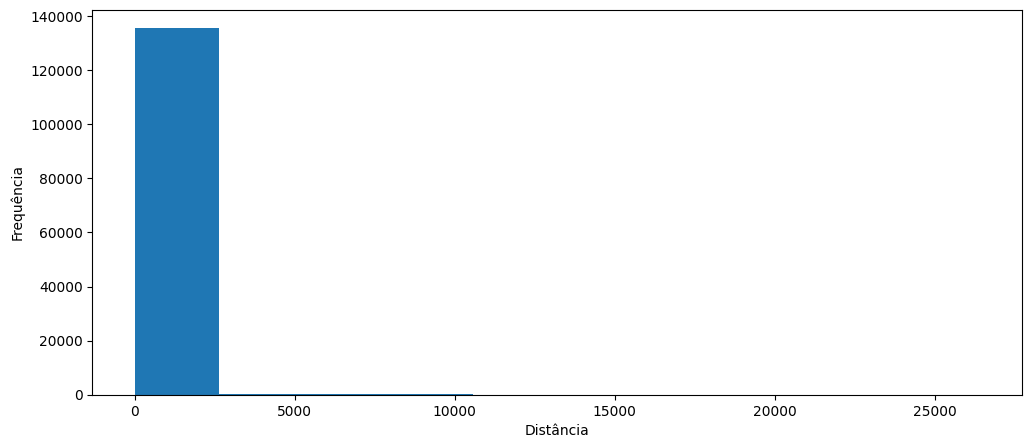

In [16]:
plt.figure(figsize=(12,5))
plt.hist(gdf_final["distancia_percorrida"])
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.show()

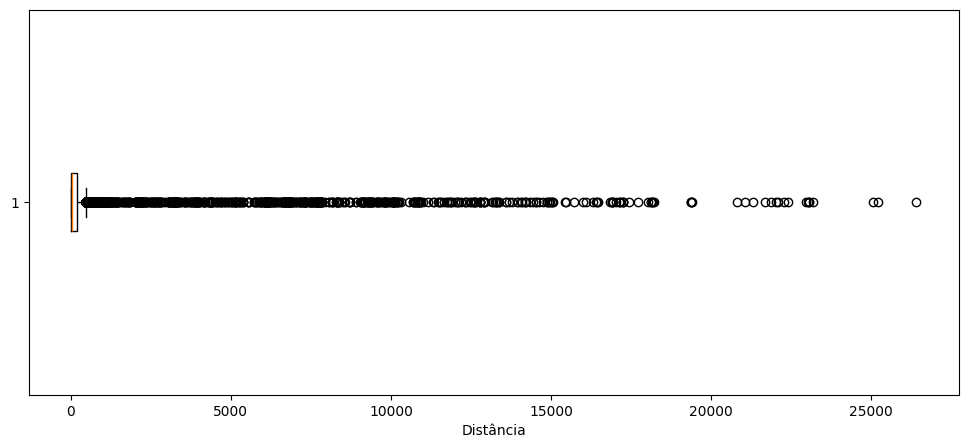

In [17]:
plt.figure(figsize=(12,5))
plt.boxplot(gdf_final["distancia_percorrida"], vert=False)
plt.xlabel("Distância")
plt.show()

In [18]:
gdf_final[gdf_final['distancia_percorrida'] >= 25000]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2
21989,31841,3459-10,False,25074.054972,"[333746.05902389076, 7394866.148214988]","[358537.9671505152, 7398617.084653763]",2025-09-03 11:31:56+00:00,2025-09-03 11:32:47+00:00,Biarticulado,0.90,586.044699,1237.545761
38922,61587,5370-10,False,25225.010680,"[325117.0786599126, 7370478.8199460115]","[332865.93880648626, 7394484.159565672]",2025-09-03 11:28:45+00:00,2025-09-03 11:29:37+00:00,Miniônibus,0.35,244.232964,840.743547
114812,32503,2678-10,False,26412.841301,"[333800.73546429066, 7394668.411742855]","[359422.7636728245, 7401083.2270999625]",2025-09-03 11:31:04+00:00,2025-09-03 11:31:48+00:00,Articulado (23m),0.85,942.623114,1888.796239


Calculando velocidades

In [19]:
gdf_final['momento_final'].dtype

datetime64[ns, UTC]

In [ ]:
gdf_final['momento_inicial'] = pd.to_datetime(gdf_final['momento_inicial'])
gdf_final['momento_final']   = pd.to_datetime(gdf_final['momento_final'])

gdf_final['momento_final'].dtype

In [21]:
gdf_final['duracao'] = (gdf_final['momento_final'] - gdf_final['momento_inicial']).dt.total_seconds()

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,4.008433,8.031963,45.0
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:28:24+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000000,0.000000,0.0
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,12.520458,25.088069,90.0
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,7.109863,14.246502,44.0
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,7.463413,14.954935,45.0


In [22]:
gdf_final["velocidade"] = (gdf_final["distancia_percorrida"] / gdf_final["duracao"]) * 3.6

gdf_final.head()

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,4.008433,8.031963,45.0,8.985488
1,41610,342M-10,True,0.000000,"[341969.5112152252, 7398127.429994314]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:28:24+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,0.000000,0.000000,0.0,NaN
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,12.520458,25.088069,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,7.109863,14.246502,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,7.463413,14.954935,45.0,16.730330


In [23]:
gdf_final['velocidade'].describe()

c:\Users\caiod\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.034370e+05
mean              inf
std               NaN
min     -3.775935e+01
25%      8.924268e-01
50%      9.322036e+00
75%      1.785140e+01
max               inf
Name: velocidade, dtype: float64

In [24]:
gdf_final[(gdf_final['velocidade'] >= 0) & (gdf_final['velocidade'] <= 50)]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
0,41610,342M-10,False,112.318604,"[342081.78002049256, 7398124.085733271]","[341969.5112152252, 7398127.429994314]",2025-09-03 11:27:39+00:00,2025-09-03 11:28:24+00:00,Articulado (23m),0.85,4.008433,8.031963,45.0,8.985488
2,41610,342M-10,True,350.830430,"[341969.5112152252, 7398127.429994314]","[341740.3574120132, 7397861.778859812]",2025-09-03 11:28:24+00:00,2025-09-03 11:29:54+00:00,Articulado (23m),0.85,12.520458,25.088069,90.0,14.033217
3,41610,342M-10,False,199.222435,"[341740.3574120132, 7397861.778859812]","[341610.7160945124, 7397710.508547873]",2025-09-03 11:29:54+00:00,2025-09-03 11:30:38+00:00,Articulado (23m),0.85,7.109863,14.246502,44.0,16.300017
4,41610,342M-10,True,209.129131,"[341610.7160945124, 7397710.508547873]","[341474.75205618294, 7397551.609921319]",2025-09-03 11:30:38+00:00,2025-09-03 11:31:23+00:00,Articulado (23m),0.85,7.463413,14.954935,45.0,16.730330
6,41610,342M-10,True,103.787302,"[341474.75205618294, 7397551.609921319]","[341450.1347490767, 7397450.784368243]",2025-09-03 11:31:23+00:00,2025-09-03 11:32:08+00:00,Articulado (23m),0.85,3.703968,7.421885,45.0,8.302984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136061,13639,9014-10,False,0.000000,"[326467.6864551779, 7397860.951749464]","[326467.6864551779, 7397860.951749464]",2025-09-03 11:34:02+00:00,2025-09-03 11:34:27+00:00,Miniônibus,0.35,0.000000,0.000000,25.0,0.000000
136062,13639,9014-10,True,0.000000,"[326467.6864551779, 7397860.951749464]","[326467.6864551779, 7397860.951749464]",2025-09-03 11:34:27+00:00,2025-09-03 11:34:47+00:00,Miniônibus,0.35,0.000000,0.000000,20.0,0.000000
136064,77879,6049-10,False,0.000000,"[320068.8812658792, 7382609.836585452]","[320068.8812658792, 7382609.836585452]",2025-09-03 11:34:18+00:00,2025-09-03 11:35:03+00:00,Articulado (18m),0.80,0.000000,0.000000,45.0,0.000000
136065,31643,274P-10,True,79.442467,"[334093.9212274977, 7394299.5003555715]","[334040.2683614021, 7394240.9130234085]",2025-09-03 11:34:08+00:00,2025-09-03 11:34:53+00:00,Articulado (18m),0.80,2.670732,4.302383,45.0,6.355397


In [25]:
gdf_final[gdf_final['velocidade'] > 50]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
48,41583,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 11:27:38+00:00,2025-09-03 11:28:30+00:00,Midiônibus,0.47,282.001456,495.090932,52.0,883.845887
98,41815,342M-10,False,12766.662806,"[342071.82555585005, 7398209.143348921]","[349387.50354469114, 7387746.422155516]",2025-09-03 11:28:35+00:00,2025-09-03 11:29:20+00:00,Miniônibus,0.35,123.609061,425.509805,45.0,1021.333024
105,41815,342M-10,True,12766.662806,"[349387.50354469114, 7387746.422155516]","[342071.82555585005, 7398209.143348921]",2025-09-03 11:33:05+00:00,2025-09-03 11:33:50+00:00,Miniônibus,0.35,123.609061,425.509805,45.0,1021.333024
280,16012,9191-10,False,9188.408306,"[333415.14199033706, 7397208.287510074]","[328564.67902236397, 7405012.123502918]",2025-09-03 11:30:41+00:00,2025-09-03 11:31:26+00:00,Biarticulado,0.90,214.756567,453.499674,45.0,735.072665
333,16372,9191-10,False,9160.841764,"[333288.33738785924, 7397163.0424438175]","[328564.67902236397, 7405012.123502918]",2025-09-03 11:28:36+00:00,2025-09-03 11:29:20+00:00,Midiônibus,0.47,202.352859,355.257263,44.0,749.523417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135993,32053,2765-10,True,9788.776238,"[339036.9549540298, 7395834.884184625]","[347261.97112645453, 7401142.355258925]",2025-09-03 11:32:00+00:00,2025-09-03 11:32:45+00:00,Biarticulado,0.90,228.788699,483.131211,45.0,783.102099
136015,32018,805L-10,False,4384.908831,"[333125.8381888706, 7391735.523750455]","[332183.3600302363, 7396017.948341782]",2025-09-03 11:32:50+00:00,2025-09-03 11:33:34+00:00,Biarticulado,0.90,102.486518,216.419935,44.0,358.765268
136026,72014,6804-10,True,1659.803675,"[323118.3063822094, 7384129.283980075]","[321535.9105864066, 7384630.254821043]",2025-09-03 11:32:54+00:00,2025-09-03 11:33:39+00:00,Miniônibus,0.35,16.070509,55.320858,45.0,132.784294
136056,71746,5111-10,False,13956.203554,"[333642.65488864016, 7394863.699479774]","[325719.849591805, 7383374.366432779]",2025-09-03 11:34:21+00:00,2025-09-03 11:35:06+00:00,Articulado (18m),0.80,469.185876,755.829230,45.0,1116.496284


In [26]:
gdf_final[gdf_final['velocidade'] < 0]

,id_onibus,linha,is_eletrico,distancia_percorrida,ponto_inicial,ponto_final,momento_inicial,momento_final,modelo,litro_diesel_km,emissao_no2,emissao_co2,duracao,velocidade
4783,16997,9009-10,True,241.547944,"[325267.4163857574, 7406976.519208906]","[325057.01902536, 7407095.171474321]",2025-09-03 11:33:35+00:00,2025-09-03 11:32:51+00:00,Midiônibus,0.47,5.335527,9.367225,-44.0,-19.763014
6144,22014,1788-31,True,83.337860,"[334762.85579085816, 7401093.616018793]","[334728.801222185, 7401169.678396165]",2025-09-03 11:32:15+00:00,2025-09-03 11:31:44+00:00,Miniônibus,0.35,0.806892,2.777631,-31.0,-9.677945
17192,86607,7040-10,False,551.474464,"[324155.26176654524, 7386703.361344764]","[323699.8837724421, 7386392.306740123]",2025-09-03 11:27:37+00:00,2025-09-03 10:54:57+00:00,Midiônibus,0.47,12.181461,21.386169,-1960.0,-1.012912
29215,32875,273G-10,False,718.056107,"[349581.21236960625, 7396731.19324353]","[349176.12609870103, 7396138.310721114]",2025-09-03 11:27:57+00:00,2025-09-03 11:25:19+00:00,Articulado (18m),0.80,24.139930,38.887925,-158.0,-16.360772
29216,32875,273G-10,False,1039.486229,"[349514.1344360255, 7397162.779598037]","[349243.6330773257, 7396159.106027492]",2025-09-03 11:28:46+00:00,2025-09-03 11:25:25+00:00,Articulado (18m),0.80,34.945912,56.295688,-201.0,-18.617664
34773,22719,2011-10,True,23.376617,"[336275.82861230825, 7402263.622519552]","[336265.54079854896, 7402242.631399241]",2025-09-03 11:30:57+00:00,2025-09-03 11:30:14+00:00,Biarticulado,0.90,0.546371,1.153768,-43.0,-1.957112
35938,7311,677A-10,False,17.291499,"[321997.143028504, 7380890.886874039]","[322014.42910456803, 7380891.319898171]",2025-09-03 11:31:51+00:00,2025-09-03 11:31:44+00:00,Biarticulado,0.90,0.404146,0.853433,-7.0,-8.892771
42101,11891,917H-10,True,109.876141,"[323741.81680831104, 7401545.598937911]","[323650.4036540873, 7401484.636640738]",2025-09-03 11:31:30+00:00,2025-09-02 16:08:55+00:00,Padron,0.63,2.529721,4.148211,-69755.0,-0.005671
50064,22056,2010-10,False,136.353215,"[335472.0223694437, 7400140.933067883]","[335393.1414819468, 7400029.712544922]",2025-09-03 11:32:54+00:00,2025-09-03 11:32:41+00:00,Miniônibus,0.35,1.320196,4.544620,-13.0,-37.759352
57536,31706,2626-10,False,3800.631295,"[353827.2655198211, 7400921.93394915]","[355997.7727761133, 7397802.0466933325]",2025-09-03 11:29:21+00:00,2025-09-03 10:59:03+00:00,Padron,0.63,87.503391,143.487195,-1818.0,-7.526003
